# Numerical Simulation Laboratory

## Numerical exercise 4 
I risultati di questa esercitazione sono qui riportati suddivisi per le diverse fasi dell'Argon seguendo il procedimento della simulazione e non la suddivisone nei quattro esercizi. Per ciascuna fase della simulazione ho effettuato i seguenti step:
- *Equilibrazione del sistema*, per ottenere una temperatura istantanea oscillante intorno alla temperatura desiderata.
- *Simulazione vera e propria*, per stimare energia, temperatura e pressione utilizzando il metodo delle medie a blocchi.

Per tutte le fasi ho utilizzato $108$ particelle e ho stimato posizioni e accelerazioni delle particelle ogni step  corrispondente a $dt^\star=0.0005$ in unità ridotte. Tale valore corrisponde per l'Argon ad un intervallo di tempo par a $dt=1.075 fs$.

In [130]:
#conversione unità ridotte in unità SI

import math
sigma = 0.34 * 10**-9  #unità di lunghezza in metri
epsilon = 120 * 1.380649 * 10**-23  #unità di energia in Joule
m = 6.6335209 * 10**-26  #unità di massa in Kg
t = 120  #unità di temperatura in K
dt = 2.151387810198478e-12 #unità di tempo in s

## Fase solida
Per il sistema nella fase solida utilizzo i seguenti valori di temperatura, densità e cut-off del potenziale riportati qui in unità ridotte di *Lennard-Jones*.
- Cut-off $r_c = 2.2$
- Densità $\rho^\star=1.1$
- Temperatura $T^\star=0.8$

### <font color=red> Equilibrazione del sistema </font>
Effettuo l'equilibrazione del sistema solido a partire dalla configurazione cristallina ideale *FCC* e rilancio la simulazione finchè non osservo che la temperatura istantanea del sistema oscilla intorno al valore target $T^\star$. In ogni rilancio faccio partire la simulazione dalle ultime due configurazioni precedenti e riscalo le velocità in modo da portare il sistema alla temperatura desiderata; inoltre in ogni rilancio effettuo $15000$ step in modo da far interagire le particelle e portare il sistema in una condizione di equilibrio. 

Il grafico sottostante mostra i valori della temperatura istantanea ad ogni rilancio: poichè le misre sono effettuate ogni $10$ step ogni rilancio presenta $1500$ valori. Come si può osservare, dopo quattro rilanci la temperatura oscilla intorno al valore desiderato perciò posso considerare il sistema all'equilibro. 

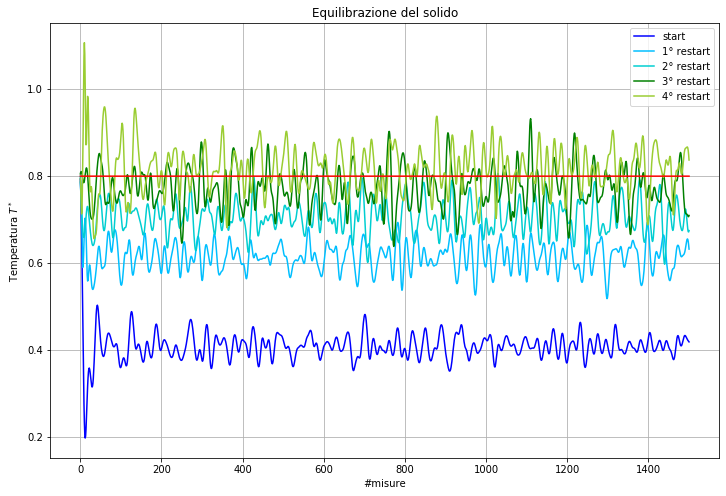

In [131]:
import math
import numpy as np
import matplotlib.pyplot as plt

N=1500  #numero misure
nlanci=5  #numero di lanci
plt.figure(figsize=(12, 8))

x=np.linspace(0, N, N)
temp= np.loadtxt('Files/solid/temp.out', delimiter = '  ', unpack = 'True')
target = 0.8*x**0

start = [ [],[],[],[],[] ]
labels = ["start", "1° restart", "2° restart", "3° restart", "4° restart"]
colors = ["blue", "deepskyblue", "darkturquoise", "green", "yellowgreen"]
for i in range(nlanci):
    for j in range(N):
        start[i].append(temp[i*N+j])
        
for i in range (nlanci):
    plt.plot(x, start[i], label=labels[i], color=colors[i])  #primi 5 riavvii della simulazione
plt.plot(x, target, color='red') #temperatura target
    
plt.xlabel('#misure')
plt.ylabel('Temperatura $T^*$')    
plt.title('Equilibrazione del solido')
plt.legend()
plt.grid(True)

### <font color=red> Simulazione </font>

Dopo aver equilibrato il sistema effettuo la simulazione vera e propria, determinando i valori delle grandezze termodinamiche tramite il metodo delle **medie a blocchi**. I risultati seguenti sono stati ottenuti simulando il sistema per $5\times 10^5$ step,  corrispondenti ad un intervallo temporale di $0,54 ns$. Le medie e le incertezze statistiche sono state calcolate suddividendo le misure in $100$ blocchi contenenti ciascuno $500$ misure istantanee di temperatura, energia e pressione.

La gif qui riportata mostra la dinamica molecolare ottenuta a partire dalla configurazione riequilibrata: si può osservare che le molecole si muovono intorno alla posizione di equilibrio reticolare mantenendo la struttura cristallina del solido.
<img src="Pictures/solid.gif"  width="400">

### <font color=blue> Energia </font>
I grafici sottostanti riportano l'andamento dell'energia durante la simulazione e mostrano come tende a stabilizzarsi durante l'evoluzione del sistema.

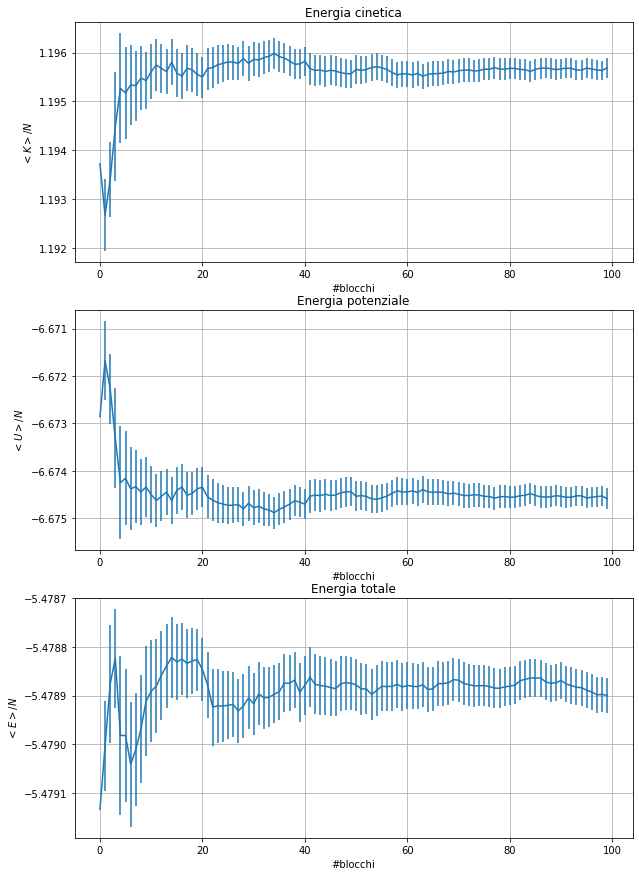

In [132]:
x, ekin, errekin= np.loadtxt('Files/solid/ave_ekin.out', delimiter = '  ', unpack = 'True')
x, epot, errepot= np.loadtxt('Files/solid/ave_epot.out', delimiter = '  ', unpack = 'True')
x, etot, erretot= np.loadtxt('Files/solid/ave_etot.out', delimiter = '  ', unpack = 'True')

plt.figure(figsize=(10, 15))

plt.subplot(311)  #energia cinetica
plt.errorbar(x, ekin, yerr=errekin)
plt.title("Energia cinetica")
plt.ylabel('$<K>/N$')
plt.xlabel('#blocchi')
plt.grid(True)

plt.subplot(312)  #energia potenziale
plt.errorbar(x, epot, yerr=errepot)
plt.title("Energia potenziale")
plt.ylabel('$<U>/N$')
plt.xlabel('#blocchi')

plt.grid(True)

plt.subplot(313)   #energia totale
plt.errorbar(x, etot, yerr=erretot)
plt.title("Energia totale")
plt.ylabel('$<E>/N$')
plt.xlabel('#blocchi')
plt.grid(True)

plt.show()

### <font color=blue> Temperatura </font>
[..]

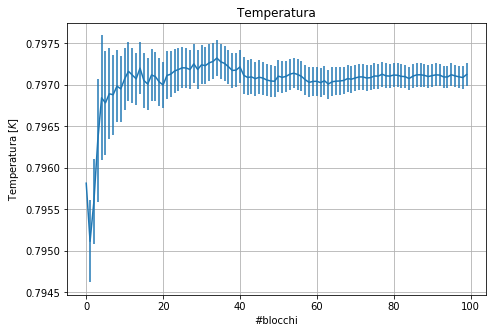

In [133]:
x, temp, errtemp= np.loadtxt('Files/solid/ave_temp.out', delimiter = '  ', unpack = 'True')

plt.figure(figsize=(7.5, 5))

Tsi=0.8*x**0
plt.errorbar(x, temp, yerr=errtemp, label='temperatura ossersvata')  #temperatura osservata
#plt.plot(x, Tsi, color='red', label='temperatura desiderata')  #temperatura desiderata

plt.xlabel('#blocchi')
plt.ylabel('Temperatura $[K]$')
plt.title('Temperatura')
plt.grid(True)

### <font color=blue> Pressione </font>
[..]

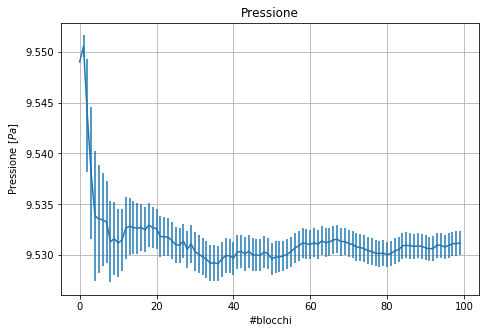

In [134]:
x, pres, errpres= np.loadtxt('Files/solid/ave_pres.out', delimiter = '  ', unpack = 'True')

plt.figure(figsize=(7.5, 5))
plt.errorbar(x, pres, yerr=errpres, label='pressione osservata')  #pressione osservata

plt.xlabel('#blocchi')
plt.ylabel('Pressione $[Pa]$')
plt.title('Pressione')
plt.grid(True)

## Fase liquida
Per il sistema nella fase solida utilizzo i seguenti valori di temperatura, densità e cut-off del potenziale riportati qui in unità ridotte di *Lennard-Jones*.
- Cut-off $r_c = 2.2$
- Densità $\rho^\star=1.1$
- Temperatura $T^\star=0.8$

### <font color=red> Equilibrazione del sistema </font>
Effettuo l'equilibrazione del sistema solido a partire dalla configurazione cristallina ideale *FCC* e rilancio la simulazione finchè non osservo che la temperatura istantanea del sistema oscilla intorno al valore target $T^\star$. In ogni rilancio faccio partire la simulazione dalle ultime due configurazioni precedenti e riscalo le velocità in modo da portare il sistema alla temperatura desiderata; inoltre in ogni rilancio effettuo $15000$ step in modo da far interagire le particelle e portare il sistema in una condizione di equilibrio. 

Il grafico sottostante mostra i valori della temperatura istantanea ad ogni rilancio: poichè le misre sono effettuate ogni $10$ step ogni rilancio presenta $1500$ valori. Come si può osservare, dopo quattro rilanci la temperatura oscilla intorno al valore desiderato perciò posso considerare il sistema all'equilibro. 

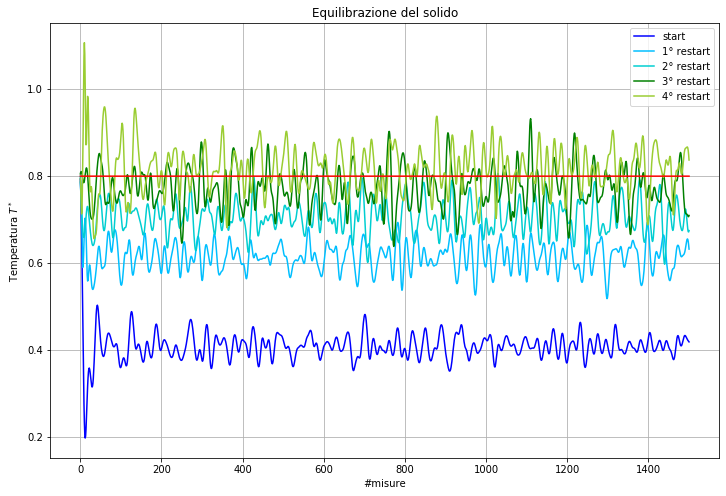

In [131]:
import math
import numpy as np
import matplotlib.pyplot as plt

N=1500  #numero misure
nlanci=5  #numero di lanci
plt.figure(figsize=(12, 8))

x=np.linspace(0, N, N)
temp= np.loadtxt('Files/solid/temp.out', delimiter = '  ', unpack = 'True')
target = 0.8*x**0

start = [ [],[],[],[],[] ]
labels = ["start", "1° restart", "2° restart", "3° restart", "4° restart"]
colors = ["blue", "deepskyblue", "darkturquoise", "green", "yellowgreen"]
for i in range(nlanci):
    for j in range(N):
        start[i].append(temp[i*N+j])
        
for i in range (nlanci):
    plt.plot(x, start[i], label=labels[i], color=colors[i])  #primi 5 riavvii della simulazione
plt.plot(x, target, color='red') #temperatura target
    
plt.xlabel('#misure')
plt.ylabel('Temperatura $T^*$')    
plt.title('Equilibrazione del solido')
plt.legend()
plt.grid(True)

### <font color=red> Simulazione </font>

Dopo aver equilibrato il sistema effettuo la simulazione vera e propria, determinando i valori delle grandezze termodinamiche tramite il metodo delle **medie a blocchi**. I risultati seguenti sono stati ottenuti simulando il sistema per $5\times 10^5$ step,  corrispondenti ad un intervallo temporale di $0,54 ns$. Le medie e le incertezze statistiche sono state calcolate suddividendo le misure in $100$ blocchi contenenti ciascuno $500$ misure istantanee di temperatura, energia e pressione.

La gif qui riportata mostra la dinamica molecolare ottenuta a partire dalla configurazione riequilibrata: si può osservare che le molecole si muovono intorno alla posizione di equilibrio reticolare mantenendo la struttura cristallina del solido.
<img src="Pictures/liquid.gif"  width="400">

### <font color=blue> Energia </font>
I grafici sottostanti riportano l'andamento dell'energia durante la simulazione e mostrano come tende a stabilizzarsi durante l'evoluzione del sistema.

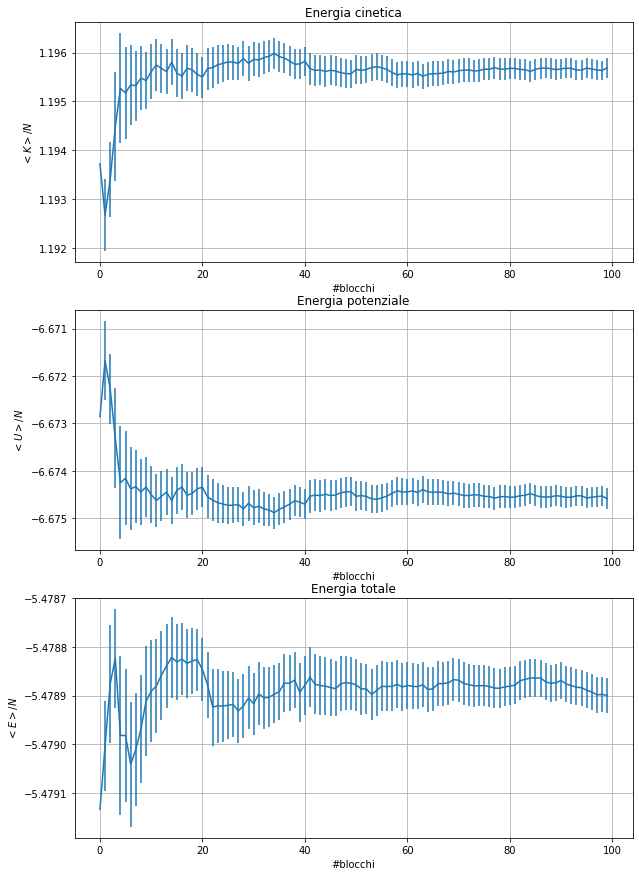

In [132]:
x, ekin, errekin= np.loadtxt('Files/solid/ave_ekin.out', delimiter = '  ', unpack = 'True')
x, epot, errepot= np.loadtxt('Files/solid/ave_epot.out', delimiter = '  ', unpack = 'True')
x, etot, erretot= np.loadtxt('Files/solid/ave_etot.out', delimiter = '  ', unpack = 'True')

plt.figure(figsize=(10, 15))

plt.subplot(311)  #energia cinetica
plt.errorbar(x, ekin, yerr=errekin)
plt.title("Energia cinetica")
plt.ylabel('$<K>/N$')
plt.xlabel('#blocchi')
plt.grid(True)

plt.subplot(312)  #energia potenziale
plt.errorbar(x, epot, yerr=errepot)
plt.title("Energia potenziale")
plt.ylabel('$<U>/N$')
plt.xlabel('#blocchi')

plt.grid(True)

plt.subplot(313)   #energia totale
plt.errorbar(x, etot, yerr=erretot)
plt.title("Energia totale")
plt.ylabel('$<E>/N$')
plt.xlabel('#blocchi')
plt.grid(True)

plt.show()

### <font color=blue> Temperatura </font>
[..]

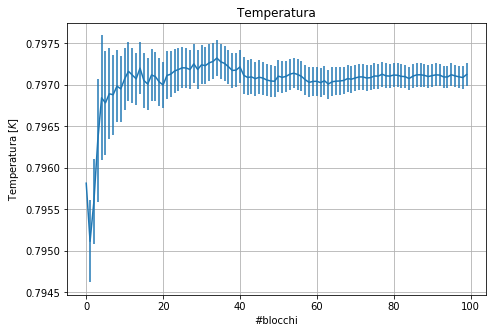

In [133]:
x, temp, errtemp= np.loadtxt('Files/solid/ave_temp.out', delimiter = '  ', unpack = 'True')

plt.figure(figsize=(7.5, 5))

Tsi=0.8*x**0
plt.errorbar(x, temp, yerr=errtemp, label='temperatura ossersvata')  #temperatura osservata
#plt.plot(x, Tsi, color='red', label='temperatura desiderata')  #temperatura desiderata

plt.xlabel('#blocchi')
plt.ylabel('Temperatura $[K]$')
plt.title('Temperatura')
plt.grid(True)

### <font color=blue> Pressione </font>
[..]

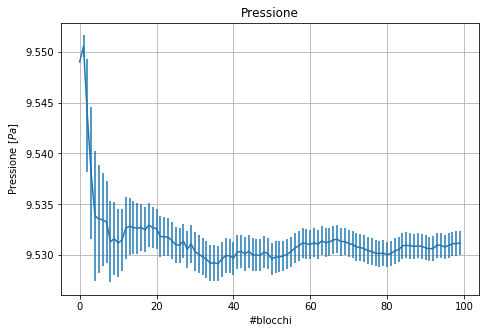

In [134]:
x, pres, errpres= np.loadtxt('Files/solid/ave_pres.out', delimiter = '  ', unpack = 'True')

plt.figure(figsize=(7.5, 5))
plt.errorbar(x, pres, yerr=errpres, label='pressione osservata')  #pressione osservata

plt.xlabel('#blocchi')
plt.ylabel('Pressione $[Pa]$')
plt.title('Pressione')
plt.grid(True)

## Fase gassosa
Per il sistema nella fase solida utilizzo i seguenti valori di temperatura, densità e cut-off del potenziale riportati qui in unità ridotte di *Lennard-Jones*.
- Cut-off $r_c = 2.2$
- Densità $\rho^\star=1.1$
- Temperatura $T^\star=0.8$

### <font color=red> Equilibrazione del sistema </font>
Effettuo l'equilibrazione del sistema solido a partire dalla configurazione cristallina ideale *FCC* e rilancio la simulazione finchè non osservo che la temperatura istantanea del sistema oscilla intorno al valore target $T^\star$. In ogni rilancio faccio partire la simulazione dalle ultime due configurazioni precedenti e riscalo le velocità in modo da portare il sistema alla temperatura desiderata; inoltre in ogni rilancio effettuo $15000$ step in modo da far interagire le particelle e portare il sistema in una condizione di equilibrio. 

Il grafico sottostante mostra i valori della temperatura istantanea ad ogni rilancio: poichè le misre sono effettuate ogni $10$ step ogni rilancio presenta $1500$ valori. Come si può osservare, dopo quattro rilanci la temperatura oscilla intorno al valore desiderato perciò posso considerare il sistema all'equilibro. 

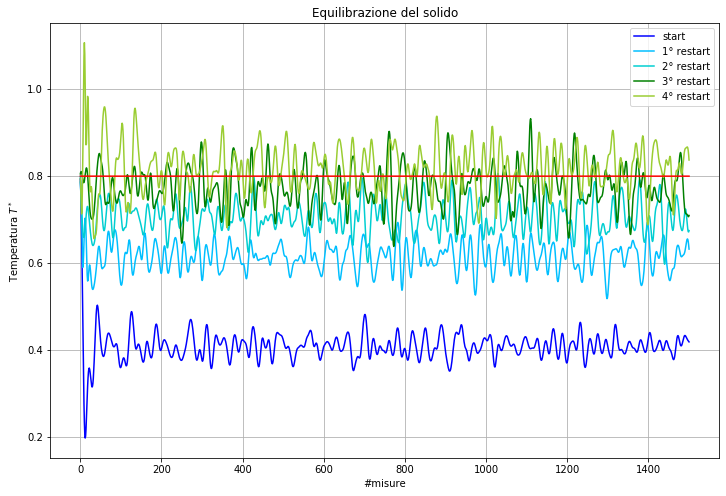

In [131]:
import math
import numpy as np
import matplotlib.pyplot as plt

N=1500  #numero misure
nlanci=5  #numero di lanci
plt.figure(figsize=(12, 8))

x=np.linspace(0, N, N)
temp= np.loadtxt('Files/solid/temp.out', delimiter = '  ', unpack = 'True')
target = 0.8*x**0

start = [ [],[],[],[],[] ]
labels = ["start", "1° restart", "2° restart", "3° restart", "4° restart"]
colors = ["blue", "deepskyblue", "darkturquoise", "green", "yellowgreen"]
for i in range(nlanci):
    for j in range(N):
        start[i].append(temp[i*N+j])
        
for i in range (nlanci):
    plt.plot(x, start[i], label=labels[i], color=colors[i])  #primi 5 riavvii della simulazione
plt.plot(x, target, color='red') #temperatura target
    
plt.xlabel('#misure')
plt.ylabel('Temperatura $T^*$')    
plt.title('Equilibrazione del solido')
plt.legend()
plt.grid(True)

### <font color=red> Simulazione </font>

Dopo aver equilibrato il sistema effettuo la simulazione vera e propria, determinando i valori delle grandezze termodinamiche tramite il metodo delle **medie a blocchi**. I risultati seguenti sono stati ottenuti simulando il sistema per $5\times 10^5$ step,  corrispondenti ad un intervallo temporale di $0,54 ns$. Le medie e le incertezze statistiche sono state calcolate suddividendo le misure in $100$ blocchi contenenti ciascuno $500$ misure istantanee di temperatura, energia e pressione.

La gif qui riportata mostra la dinamica molecolare ottenuta a partire dalla configurazione riequilibrata: si può osservare che le molecole si muovono intorno alla posizione di equilibrio reticolare mantenendo la struttura cristallina del solido.
<img src="Pictures/gas.gif"  width="400">

### <font color=blue> Energia </font>
I grafici sottostanti riportano l'andamento dell'energia durante la simulazione e mostrano come tende a stabilizzarsi durante l'evoluzione del sistema.

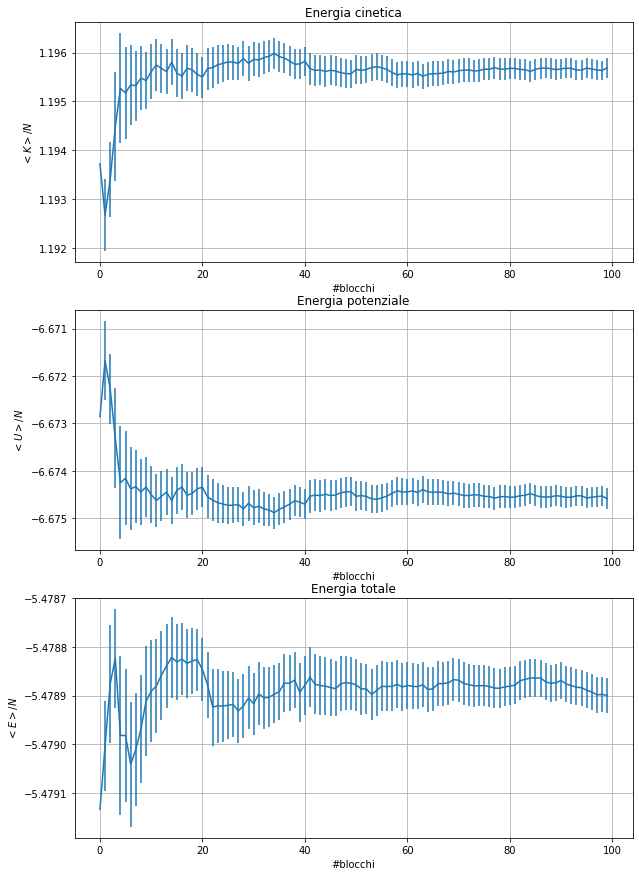

In [132]:
x, ekin, errekin= np.loadtxt('Files/solid/ave_ekin.out', delimiter = '  ', unpack = 'True')
x, epot, errepot= np.loadtxt('Files/solid/ave_epot.out', delimiter = '  ', unpack = 'True')
x, etot, erretot= np.loadtxt('Files/solid/ave_etot.out', delimiter = '  ', unpack = 'True')

plt.figure(figsize=(10, 15))

plt.subplot(311)  #energia cinetica
plt.errorbar(x, ekin, yerr=errekin)
plt.title("Energia cinetica")
plt.ylabel('$<K>/N$')
plt.xlabel('#blocchi')
plt.grid(True)

plt.subplot(312)  #energia potenziale
plt.errorbar(x, epot, yerr=errepot)
plt.title("Energia potenziale")
plt.ylabel('$<U>/N$')
plt.xlabel('#blocchi')

plt.grid(True)

plt.subplot(313)   #energia totale
plt.errorbar(x, etot, yerr=erretot)
plt.title("Energia totale")
plt.ylabel('$<E>/N$')
plt.xlabel('#blocchi')
plt.grid(True)

plt.show()

### <font color=blue> Temperatura </font>
[..]

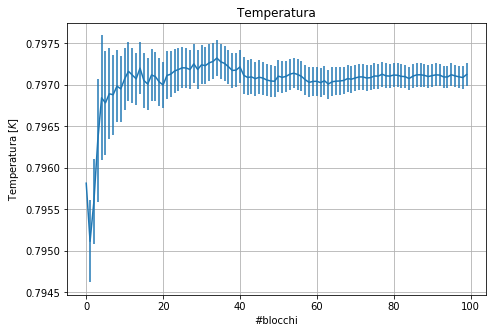

In [133]:
x, temp, errtemp= np.loadtxt('Files/solid/ave_temp.out', delimiter = '  ', unpack = 'True')

plt.figure(figsize=(7.5, 5))

Tsi=0.8*x**0
plt.errorbar(x, temp, yerr=errtemp, label='temperatura ossersvata')  #temperatura osservata
#plt.plot(x, Tsi, color='red', label='temperatura desiderata')  #temperatura desiderata

plt.xlabel('#blocchi')
plt.ylabel('Temperatura $[K]$')
plt.title('Temperatura')
plt.grid(True)

### <font color=blue> Pressione </font>
[..]

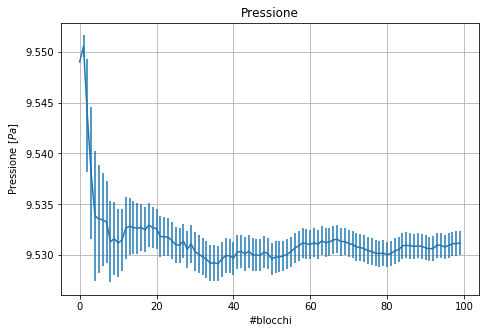

In [134]:
x, pres, errpres= np.loadtxt('Files/solid/ave_pres.out', delimiter = '  ', unpack = 'True')

plt.figure(figsize=(7.5, 5))
plt.errorbar(x, pres, yerr=errpres, label='pressione osservata')  #pressione osservata

plt.xlabel('#blocchi')
plt.ylabel('Pressione $[Pa]$')
plt.title('Pressione')
plt.grid(True)